<a href="https://colab.research.google.com/github/POde97/Cell2CellMatch/blob/main/C2CMatchExampleBaron_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install Dependencies**

In [1]:
!pip install -q networkx==2.6
!pip install -q scanpy
!pip install -q mapply
!pip install -q matplotlib==3.1.3
!pip install -q statsmodels 
!pip install -q igraph
!pip install -q leidenalg
!pip install -q louvain
!pip install -q pybiomart
!pip install -q episcanpy
!pip install -q gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.5 MB/s eta 0:00:00
Reason for being yanked: Need to resolve: https://github.com/networkx/networkx/pull/4967
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.8 MB/s

In [2]:
!git clone https://github.com/POde97/Cell2CellMatch.git

Cloning into 'Cell2CellMatch'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 293.30 KiB | 412.00 KiB/s, done.


In [3]:
cd Cell2CellMatch

/content/Cell2CellMatch


In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E' -O "Baron.h5ad"

--2023-03-27 07:25:34--  https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E
Resolving docs.google.com (docs.google.com)... 74.125.200.100, 74.125.200.139, 74.125.200.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.200.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ef632ts4e88b8j13hgnd9fketrvti80a/1679901900000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=d2073631-cde1-4b39-ba9b-431f5948ed3d [following]
--2023-03-27 07:25:41--  https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ef632ts4e88b8j13hgnd9fketrvti80a/1679901900000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=d2073631-cde1-4b39-ba9b-431f5948ed3d
Resolving doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-docs.googleusercontent.com)... 172.217.194.132, 2404:6800

#**Load data, build Cell2CellMatch network and perform community detection**


In brief, Cell2CellMatch() class generate a network representation of cells based on multiple correspondence analysis (mca) representation. Cells are connected through edges weighted by the correspondent Pvalue obtained through an hypergeometric test. Further it finds best treshold on Pvalue distribution and prune not significant edges, finally it detects community using Leiden Algoritm 

In [5]:
from CellID import*
from ProteinCoding import*
from CellID import*
from HyperG import* 
from Cell2CellMatch import*
from utils import*
from ProteinCoding import*
seed_everything(1)



In [6]:
adata = sc.read("Baron.h5ad")
adata.obs["batch"] = adata.obs["orig.ident"]
#subset data to the first two batch to speed up computation 
adata = adata[adata.obs["batch"].isin([0,1])].copy()
sc.pp.filter_cells(adata, min_counts=5)

In [7]:
C2C = Cell2CellMatch(adata,gpu_cuda = True,mply_p = 32)

Performing Cell-ID per batch


100%|██████████| 2/2 [00:46<00:00, 23.16s/it]


Hypergeometric Test


  0%|          | 0/160 [00:00<?, ?it/s]

Build network + sparsification
Find communities


In [8]:
from sklearn.metrics.cluster import adjusted_mutual_info_score as AMI
adata1 = adata[~adata.obs["C2C-cl"].isna()]
print("Adjusted Muataual Information: ",AMI(list(adata1.obs["cell.type"]),list(adata1.obs["C2C-cl"])))

Adjusted Muataual Information:  0.8665679849421101


#**Visualization**

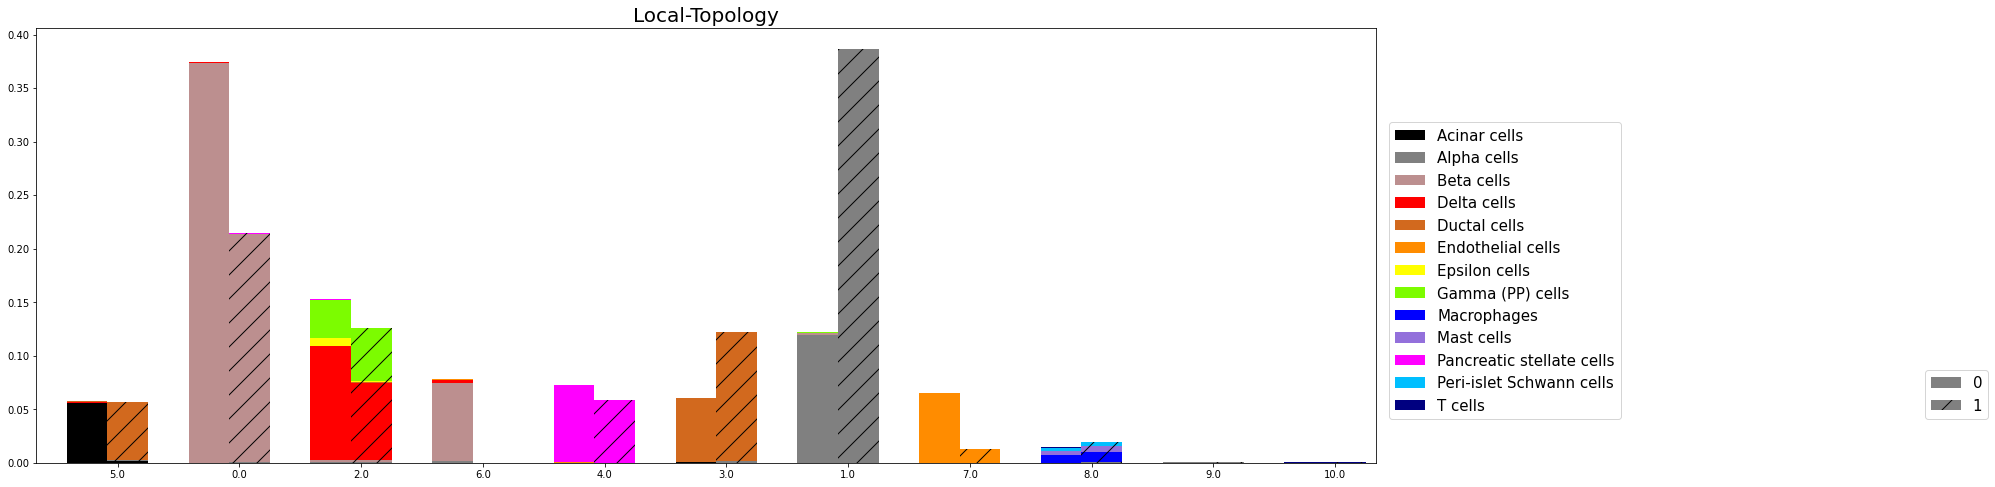

In [9]:
color = ["black","gray","rosybrown","red","chocolate","darkorange","yellow","lawngreen","blue","mediumpurple","fuchsia","deepskyblue","navy",'gainsboro']
C2C.Clvis1("cell.type",n=1,color=color)

#**Cluster signatures enrichment**

In [10]:
df_sign_cl = C2C.XClusterSignature()

In [11]:
import gseapy
gene_set_names = gseapy.get_library_name(organism='Human')
Henrich=[]
dftot = df_sign_cl
cl_l = list(dftot.index)
for i in range(len(dftot)):
  glist = list(dftot.iloc[i]["signature"])

  cl = cl_l[i]
  #glist = list(glist.dropna().drop("index").sort_values(ascending = False).index)[:200]
  enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2018',
                     
                     cutoff = 0.5)
  
  Henrich.append([cl,enr_res.results.iloc[0]["Term"],
    enr_res.results.iloc[0]["Adjusted P-value"],
    enr_res.results.iloc[0]["Genes"]])

In [12]:
d_top200 = pd.DataFrame(Henrich,columns = ["cluster","GO-Top200","P_val200","GenesTop200"])
d_top200

,cluster,GO-Top200,P_val200,GenesTop200
0,cluster-5.0,diterpenoid metabolic process (GO:0016101),1.222785e-05,CLPS;RBP2;SDC4;RARRES2;AKR1C1;APOA2;AKR1C3;RDH...
1,cluster-0.0,plasma membrane bounded cell projection organi...,3.025104e-05,ADCYAP1;GPM6A;NPY;RASGRF1;TMEM108;PRDM12;MAPT;...
2,cluster-2.0,chemical synaptic transmission (GO:0007268),6.902033e-03,GABRB3;GABRA1;CHRM3;SYT1;MCHR1;GABRG2;SHISA6;G...
3,cluster-6.0,positive regulation of T-helper 2 cell differe...,2.138917e-02,TNFSF4;NLRP3;PRKCZ
4,cluster-4.0,extracellular matrix organization (GO:0030198),1.350785e-25,SPARC;COL16A1;COL14A1;LAMC3;COL12A1;NID1;NID2;...
5,cluster-3.0,positive regulation of MAPK cascade (GO:0043410),4.213066e-05,EPHB6;EDN1;TGFB2;CAV2;TNFRSF10B;CX3CL1;EGFR;PD...
6,cluster-1.0,metal ion transport (GO:0030001),4.948469e-05,KCNJ4;KCNJ6;KCNC1;KCND3;SCN9A;KCNMB2;KCNAB1;KC...
7,cluster-7.0,vasculogenesis (GO:0001570),3.054128e-10,RAMP2;EGFL7;NOTCH1;FLT1;SOX17;SOX18;FLT4;KDR;R...
8,cluster-8.0,neutrophil degranulation (GO:0043312),1.843137e-09,ARHGAP9;FGL2;PTAFR;ITGB2;CTSS;TRPM2;GLIPR1;MMP...
9,cluster-9.0,mitotic sister chromatid segregation (GO:0000070),3.285785e-12,SPAG5;CDCA5;PLK1;KIF14;CDCA8;KIF22;KNSTRN;ZWIN...
